<a href="https://colab.research.google.com/github/OmarAlsaqa/TextMining/blob/master/text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install -r requirements.txt

     |████████████████████████████████| 4.0MB 2.8MB/s 
  Created wheel for topic-modelling-tools: filename=topic_modelling_tools-0.7.dev0-cp36-cp36m-linux_x86_64.whl size=337191 sha256=e86842e53cbf73e2fffa1c07ed33ab747ef6e3b48d7b25a1fde0486f1b1dae23
  Stored in directory: /root/.cache/pip/wheels/05/32/d1/7832c24891b653d65193ea8e444ba088d7b581a9668582bc29
Successfully built topic-modelling-tools


In [0]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [0]:
data = pd.read_table("/content/speech_data_extend.txt",encoding="utf-8")

In [14]:
data.columns

Index(['president', 'speech', 'year'], dtype='object')

In [15]:
data = data[data.year >= 1947]
len(data) # The number of documents (paragraphs of State of the Union Addresses) in the dataset

9488

In [0]:
import topicmodels

In [0]:
docsobj = topicmodels.RawDocs(data.speech, "long")

In [18]:
print(data.speech.values[3]) # fourth paragraph (note that Python uses 0-indexing)
print(docsobj.tokens[3])

I come also to welcome you as you take up your duties and to discuss with you the manner in which you and I should fulfill our obligations to the American people during the next 2 years. 
['i', 'come', 'also', 'to', 'welcome', 'you', 'as', 'you', 'take', 'up', 'your', 'duties', 'and', 'to', 'discuss', 'with', 'you', 'the', 'manner', 'in', 'which', 'you', 'and', 'i', 'should', 'fulfill', 'our', 'obligations', 'to', 'the', 'american', 'people', 'during', 'the', 'next', '2', 'years', '.']


In [0]:
docsobj.token_clean(1)

In [20]:
print(docsobj.tokens[3])

['come', 'also', 'to', 'welcome', 'you', 'as', 'you', 'take', 'up', 'your', 'duties', 'and', 'to', 'discuss', 'with', 'you', 'the', 'manner', 'in', 'which', 'you', 'and', 'should', 'fulfill', 'our', 'obligations', 'to', 'the', 'american', 'people', 'during', 'the', 'next', 'years']


In [21]:
docsobj.stopword_remove("tokens")
print(docsobj.tokens[3])

['come', 'welcome', 'duties', 'discuss', 'manner', 'fulfill', 'obligations', 'american', 'people', 'next', 'years']


In [22]:
docsobj.stem()
print(docsobj.stems[3])
docsobj.stopword_remove("stems")

['come', 'welcom', 'duti', 'discuss', 'manner', 'fulfil', 'oblig', 'american', 'peopl', 'next', 'year']


In [0]:
docsobj.term_rank("stems")

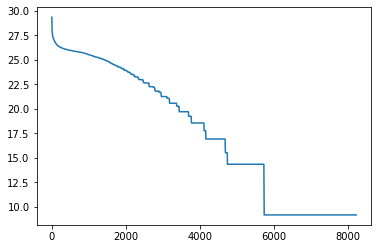

In [24]:
plt.plot([x[1] for x in docsobj.tfidf_ranking])

In [25]:
docsobj.rank_remove("tfidf","stems",docsobj.tfidf_ranking[5000][1])
all_stems = [s for d in docsobj.stems for s in d]
print("number of unique stems = %d" % len(set(all_stems)))
print("number of total stems = %d" % len(all_stems))

number of unique stems = 4742
number of total stems = 250000


In [0]:
ldaobj = topicmodels.LDA.LDAGibbs(docsobj.stems,30)

In [27]:
print(ldaobj.K) # number of topic, user defined.
print(ldaobj.alpha) # hyperparameter for document-topic distribution, automatically defined
print(ldaobj.beta) # hyperparameter for topics, automatically defined

30
1.6666666666666667
0.04217629692113033


In [28]:
print(ldaobj.topic_seed[:10])
print(ldaobj.topic_seed.shape)

[ 7 29  6 24 27  7 16  0 25 23]
(250000,)


In [29]:
ldaobj.sample(0,50,10)

Iteration 10 of (collapsed) Gibbs sampling
Iteration 20 of (collapsed) Gibbs sampling
Iteration 30 of (collapsed) Gibbs sampling
Iteration 40 of (collapsed) Gibbs sampling
Iteration 50 of (collapsed) Gibbs sampling
Iteration 60 of (collapsed) Gibbs sampling
Iteration 70 of (collapsed) Gibbs sampling
Iteration 80 of (collapsed) Gibbs sampling
Iteration 90 of (collapsed) Gibbs sampling
Iteration 100 of (collapsed) Gibbs sampling
Iteration 110 of (collapsed) Gibbs sampling
Iteration 120 of (collapsed) Gibbs sampling
Iteration 130 of (collapsed) Gibbs sampling
Iteration 140 of (collapsed) Gibbs sampling
Iteration 150 of (collapsed) Gibbs sampling
Iteration 160 of (collapsed) Gibbs sampling
Iteration 170 of (collapsed) Gibbs sampling
Iteration 180 of (collapsed) Gibbs sampling
Iteration 190 of (collapsed) Gibbs sampling
Iteration 200 of (collapsed) Gibbs sampling
Iteration 210 of (collapsed) Gibbs sampling
Iteration 220 of (collapsed) Gibbs sampling
Iteration 230 of (collapsed) Gibbs sampli

In [30]:
ldaobj.perplexity()

array([908.45723705, 868.88383707, 855.9895376 , 852.49862492,
       850.37470056, 847.12602857, 844.73855171, 844.76150178,
       842.94967346, 842.09092929])

In [31]:
ldaobj.sample(0,50,10)

Iteration 10 of (collapsed) Gibbs sampling
Iteration 20 of (collapsed) Gibbs sampling
Iteration 30 of (collapsed) Gibbs sampling
Iteration 40 of (collapsed) Gibbs sampling
Iteration 50 of (collapsed) Gibbs sampling
Iteration 60 of (collapsed) Gibbs sampling
Iteration 70 of (collapsed) Gibbs sampling
Iteration 80 of (collapsed) Gibbs sampling
Iteration 90 of (collapsed) Gibbs sampling
Iteration 100 of (collapsed) Gibbs sampling
Iteration 110 of (collapsed) Gibbs sampling
Iteration 120 of (collapsed) Gibbs sampling
Iteration 130 of (collapsed) Gibbs sampling
Iteration 140 of (collapsed) Gibbs sampling
Iteration 150 of (collapsed) Gibbs sampling
Iteration 160 of (collapsed) Gibbs sampling
Iteration 170 of (collapsed) Gibbs sampling
Iteration 180 of (collapsed) Gibbs sampling
Iteration 190 of (collapsed) Gibbs sampling
Iteration 200 of (collapsed) Gibbs sampling
Iteration 210 of (collapsed) Gibbs sampling
Iteration 220 of (collapsed) Gibbs sampling
Iteration 230 of (collapsed) Gibbs sampli

In [32]:
ldaobj.perplexity()

array([908.45723705, 868.88383707, 855.9895376 , 852.49862492,
       850.37470056, 847.12602857, 844.73855171, 844.76150178,
       842.94967346, 842.09092929, 841.94203881, 841.37908661,
       840.03977263, 839.75563751, 839.76466705, 841.51703608,
       840.48525722, 838.07176109, 838.97779591, 837.74037114])

In [0]:
ldaobj.samples_keep(4)

In [34]:
print(ldaobj.tt.shape)
print(ldaobj.dt.shape)

(4742, 30, 4)
(9488, 30, 4)


In [0]:
ldaobj.topic_content(20)

In [0]:
dt = ldaobj.dt_avg()

In [0]:
tt = ldaobj.tt_avg()
ldaobj.dict_print()

In [0]:
data = data.drop('speech',1)
for i in range(ldaobj.K): data['T' + str(i)] = dt[:,i]
data.to_csv("final_output.csv",index=False)

In [0]:
data['speech'] = [' '.join(s) for s in docsobj.stems] # replace the speech field in the original data with its cleaned version from docsobj
aggspeeches = data.groupby(['year','president'])['speech'].apply(lambda x: ' '.join(x)) # aggregate up to the speech level
aggdocs = topicmodels.RawDocs(aggspeeches) # create new RawDocs object that contains entire speech stems in aggdocs.tokens
queryobj = topicmodels.LDA.QueryGibbs(aggdocs.tokens,ldaobj.token_key,ldaobj.tt) # initialize query object with ldaobj attributes

In [40]:
queryobj.query(10) # query our four samples

Sample 0 queried
Sample 1 queried
Sample 2 queried
Sample 3 queried


In [41]:
queryobj.perplexity()

array([1234.81457846, 1233.81514649, 1233.7569761 , 1233.62843879])

In [42]:
queryobj.query(30) # query our four samples using more iterations

Sample 0 queried
Sample 1 queried
Sample 2 queried
Sample 3 queried


In [43]:
queryobj.perplexity()

array([1234.74609651, 1233.76939035, 1233.71081485, 1233.63186375])

In [0]:
dt_query = queryobj.dt_avg()
aggdata = pd.DataFrame(dt_query,index=aggspeeches.index,columns=['T' + str(i) for i in range(queryobj.K)])
aggdata.to_csv("final_output_agg.csv")

In [0]:
def top_topics(x):
	top = x.values.argsort()[-5:][::-1]
	return(pd.Series(top,index=range(1,6)))

temp = aggdata.reset_index()
ranking = temp.set_index('president')
ranking = ranking - ranking.mean()
ranking = ranking.groupby(level='president').mean()
ranking = ranking.sort_values('year')
ranking = ranking.drop('year',1)
ranking = ranking.apply(top_topics,axis=1)
ranking.to_csv("president_top_topics.csv")